<a href="https://colab.research.google.com/github/Pasindu-Madhuwantha/DL_LAB_01/blob/main/Lab01_task02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Path to the CSV file
csv_path = '/content/drive/MyDrive/Au_nanoparticle_dataset.csv'

# Load CSV into a DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows of the DataFrame
df.head()


,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,15.5898,19.4516,...,0,0,0,0,0,0,0,0,-5908.6345,343.4555
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,15.3996,24.1755,...,0,0,0,0,0,0,0,0,-6035.4034,384.8166
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,21.9199,31.0305,...,0,0,0,0,0,0,0,0,-17330.1660,800.5040
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,23.2542,37.8795,...,0,0,0,0,0,0,0,0,-26937.2010,1171.7890
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,27.1200,39.7614,...,0,0,0,0,0,0,0,0,-41427.9010,1597.7390


In [ ]:
# List of columns to keep
columns_to_keep = ['N_total', 'N_bulk', 'N_surface', 'R_avg']

# Create a new DataFrame with selected columns
filtered_df = df[columns_to_keep]

# Display the first few rows of the filtered DataFrame
filtered_df.head(20)


,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831
5,13375,10768,2607,36.6334
6,13795,11155,2640,37.0108
7,13947,11304,2643,37.1672
8,14020,11357,2663,37.2103
9,14056,11389,2667,37.2467


In [ ]:
# Calculate mean for each feature
mean_values = filtered_df.mean()

# Calculate standard deviation for each feature
std_values = filtered_df.std()

# Calculate quartile values (25th, 50th, and 75th percentiles) for each feature
quartile_values = filtered_df.quantile([0.25, 0.5, 0.75])

# Display the calculated values
print("Mean values:\n", mean_values)
print("\nStandard deviation values:\n", std_values)
print("\nQuartile values:\n", quartile_values)


Mean values:
 N_total      3476.786500
N_bulk       2521.550250
N_surface     955.236250
R_avg          20.654363
dtype: float64

Standard deviation values:
 N_total      3679.286769
N_bulk       2976.232459
N_surface     721.870220
R_avg           7.610716
dtype: float64

Quartile values:
       N_total   N_bulk  N_surface      R_avg
0.25   1061.0   618.75     437.00  15.160725
0.50   1867.0  1199.00     666.00  18.629250
0.75   4503.0  3183.00    1301.75  25.525125


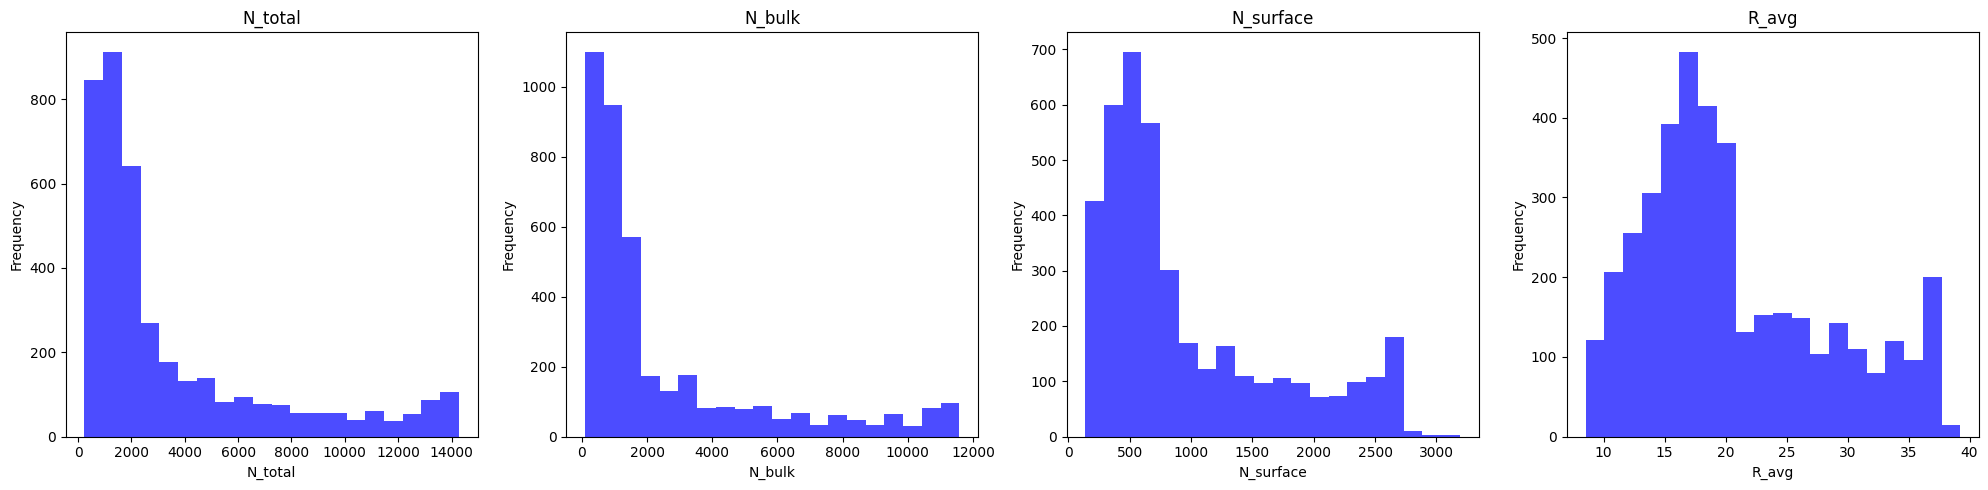

In [ ]:
import matplotlib.pyplot as plt

# Set up the 1x4 layout
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Plot histograms for each feature
for idx, column in enumerate(filtered_df.columns):
    axes[idx].hist(filtered_df[column], bins=20, color='blue', alpha=0.7)
    axes[idx].set_title(column)
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


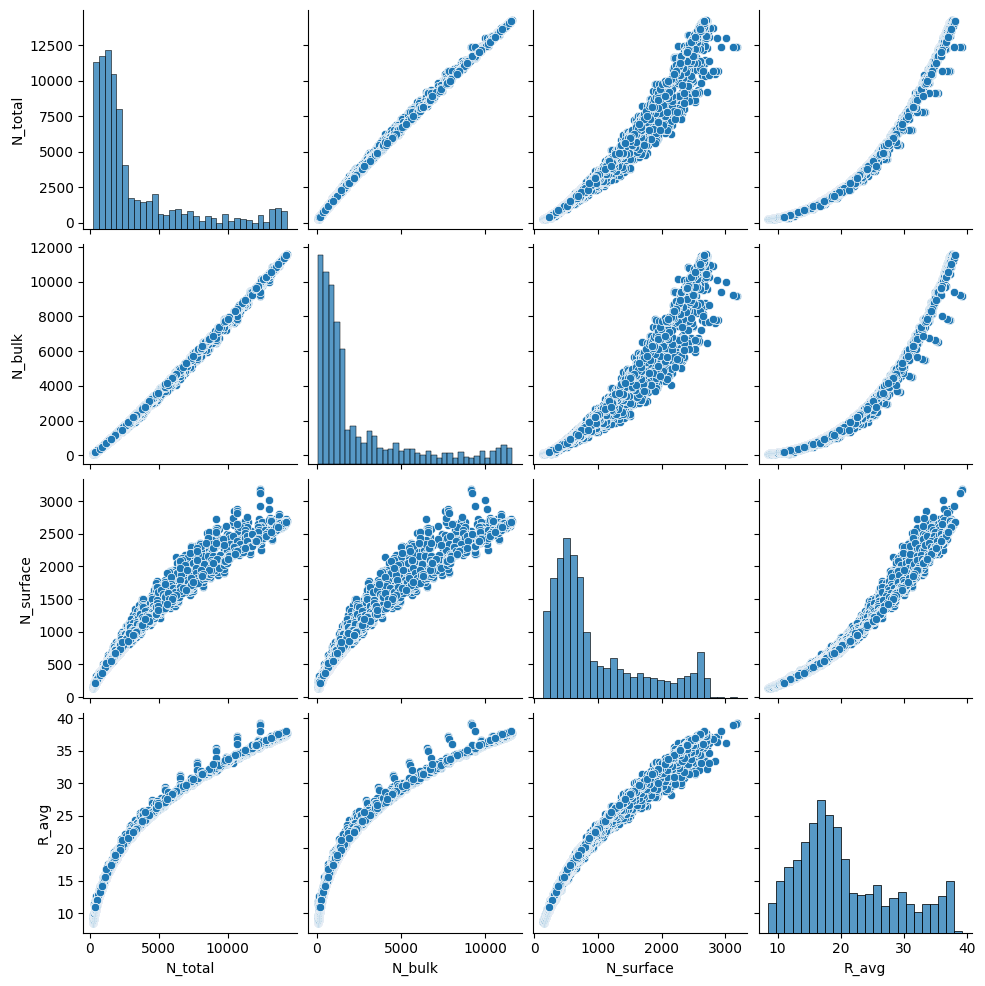

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot
sns.pairplot(filtered_df)

# Display the plot
plt.show()


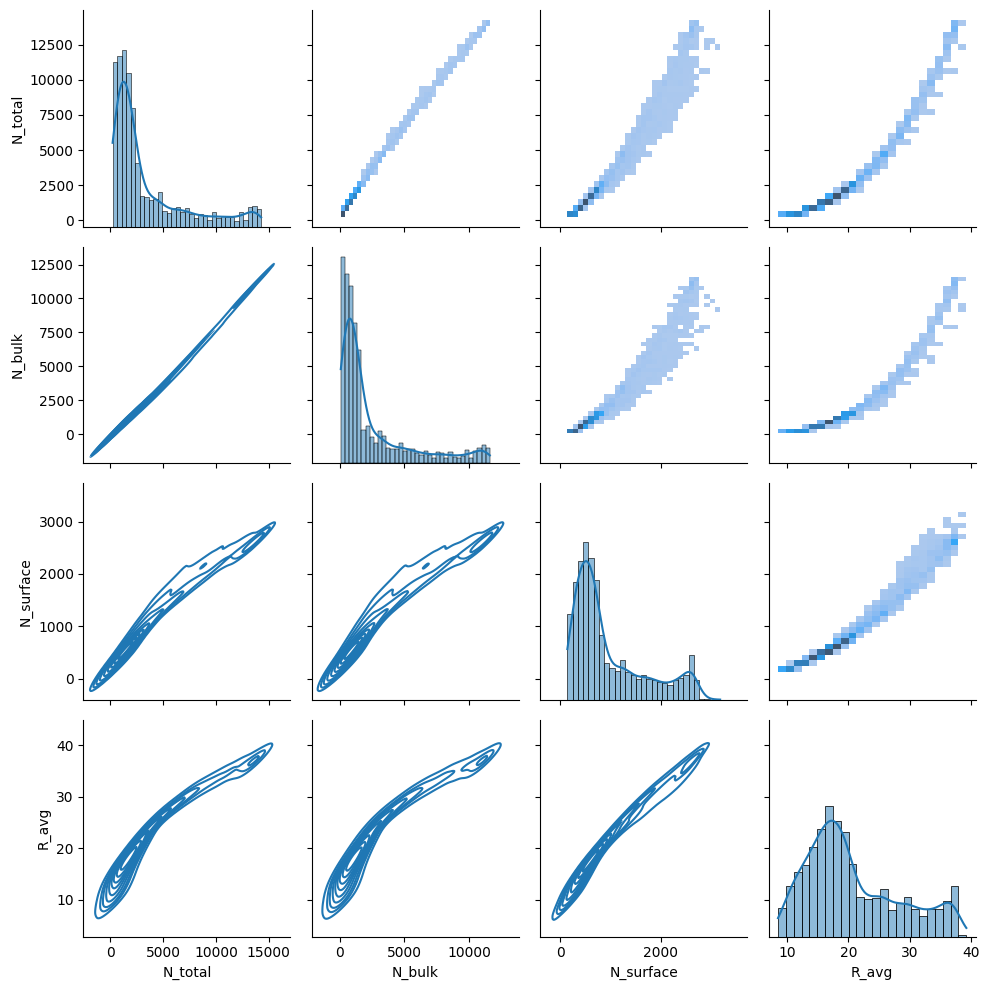

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming new_df contains the filtered dataframe with the 4 features
new_df = filtered_df  # Make sure you have defined new_df

# Create a PairGrid
g = sns.PairGrid(new_df)

# Plots on the diagonal (histogram with KDE)
g.map_diag(sns.histplot, kde=True)

# Plots on the upper half (bivariate histogram)
g.map_upper(sns.histplot)

# Plots on the lower half (bivariate KDE)
g.map_lower(sns.kdeplot)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()
